In [1]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('cpdb_public_data_searchwarrant.csv')
df.head()

,id,warrant_id,warrant_type,executed,address,issued,arrest,affiant_first_name,affiant_last_name,affiant_suffix_name,approver_pre_execution_data,approver_post_execution_data,judge_name,district,city,property_recovered,point,potential_crid,policeunit_id
0,8350,15M642,Federal Search Warrant,2015-12-16 08:04:00,3300 W Fillmore St,2015-12-15T15:40:00Z,f,NaN,NaN,NaN,Miroslaw Dobek,Miroslaw Dobek,Sidney Schenkier,11.0,Chicago,t,0101000020E61000007BB2AC4555ED55C0AC35392119EF...,1078495.0,NaN
1,19183,19SW9591,Search Warrant,2019-07-30 12:00:00,00 E Madison St,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,Patrick O Kelly,Patrick O Kelly,Thomas Hennelly,1.0,Chicago,t,0101000020E6100000C042418413E855C0186426ACE8F0...,NaN,NaN
2,19184,19SW9592,Search Warrant,2019-07-30 14:02:00,00 N Po Box 4320,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,William Riesche,William Riesche,Thomas Hennelly,31.0,Carol Stream,t,0101000020E6100000558F8F71A00856C014D5B6BCCDF4...,NaN,NaN
3,19182,19SW9590,Search Warrant,2019-07-30 10:00:00,00 N Shoreside Drive,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,Timothy Parker,Timothy Parker,Thomas Hennelly,31.0,South Barrington,t,0101000020E610000039EE940ED60A56C06B0A09BDA30C...,NaN,NaN
4,19180,19SW9588,Search Warrant,2019-07-30 16:00:00,00 S Confidential,2019-07-30T15:29:00Z,f,NaN,NaN,NaN,William Riesche,William Riesche,Thomas Hennelly,31.0,NaN,f,0101000020E6100000F3C1D77C815956C042E4993C0A51...,NaN,NaN


Predict Property recovered

In [3]:
from sklearn.model_selection import train_test_split

y = df["property_recovered"]
# x = df[["warrant_type", "executed", "district", "policeunit_id"]]
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [4]:
df["warrant_type"].unique()

array(['Federal Search Warrant', 'Search Warrant', 'City Search Warrant'],
      dtype=object)

In [5]:
mp = {'Federal Search Warrant':0, 'Search Warrant':1, 'City Search Warrant':2}

df["warrant_type_int"] = df.apply(lambda x : mp[x["warrant_type"]], axis=1)
df["time_of_day"] = df.apply(lambda x : float(x["executed"].split(" ")[1].split(":")[0]), axis=1)
df["policeunit_id_fixed"] = df.apply(lambda x: -1 if math.isnan(x["policeunit_id"]) else x["policeunit_id"], axis = 1)
df.head()

,id,warrant_id,warrant_type,executed,address,issued,arrest,affiant_first_name,affiant_last_name,affiant_suffix_name,...,judge_name,district,city,property_recovered,point,potential_crid,policeunit_id,warrant_type_int,time_of_day,policeunit_id_fixed
0,8350,15M642,Federal Search Warrant,2015-12-16 08:04:00,3300 W Fillmore St,2015-12-15T15:40:00Z,f,NaN,NaN,NaN,...,Sidney Schenkier,11.0,Chicago,t,0101000020E61000007BB2AC4555ED55C0AC35392119EF...,1078495.0,NaN,0,8.0,-1.0
1,19183,19SW9591,Search Warrant,2019-07-30 12:00:00,00 E Madison St,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,...,Thomas Hennelly,1.0,Chicago,t,0101000020E6100000C042418413E855C0186426ACE8F0...,NaN,NaN,1,12.0,-1.0
2,19184,19SW9592,Search Warrant,2019-07-30 14:02:00,00 N Po Box 4320,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,...,Thomas Hennelly,31.0,Carol Stream,t,0101000020E6100000558F8F71A00856C014D5B6BCCDF4...,NaN,NaN,1,14.0,-1.0
3,19182,19SW9590,Search Warrant,2019-07-30 10:00:00,00 N Shoreside Drive,2019-07-29T10:00:00Z,f,NaN,NaN,NaN,...,Thomas Hennelly,31.0,South Barrington,t,0101000020E610000039EE940ED60A56C06B0A09BDA30C...,NaN,NaN,1,10.0,-1.0
4,19180,19SW9588,Search Warrant,2019-07-30 16:00:00,00 S Confidential,2019-07-30T15:29:00Z,f,NaN,NaN,NaN,...,Thomas Hennelly,31.0,NaN,f,0101000020E6100000F3C1D77C815956C042E4993C0A51...,NaN,NaN,1,16.0,-1.0


In [6]:
df["day_night"] = df.apply(lambda x : 0 if x["time_of_day"] > 8 or x["time_of_day"] < 4 else 1, axis=1)

In [7]:
x  = df[["warrant_type_int", "time_of_day", "district", "policeunit_id_fixed", "day_night", "property_recovered"]]
#Remove NaN rows
x = x[x["district"] < 50]

y = x["property_recovered"]
x = x[["warrant_type_int", "time_of_day", "district", "policeunit_id_fixed", "day_night"]]

In [8]:
#["warrant_type_int"]["time_of_day"] ["district"] ["policeunit_id_fixed"]
x["district"].unique()

array([11.,  1., 31., 24., 19.,  4., 10., 25., 17.,  0.,  8., 16.,  2.,
        7.,  6., 15.,  3.,  5., 22.,  9., 18., 41., 12., 13., 14., 20.,
       21., 23.])

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0,class_weight="balanced")

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5,scoring='f1_macro')


In [11]:
sum(scores) / len(scores)

0.593307910607368

In [12]:
results = []
#for i in range(1, 30):
#  clf = RandomForestClassifier(max_depth=i, random_state=0,class_weight="balanced")
#  scores = cross_val_score(clf, x, y, cv=5,scoring='f1_macro')
#  results.append(sum(scores) / len(scores))


In [13]:
#plt.plot(range(1,30), results)
#print(results)

In [14]:
#from sklearn.ensemble import AdaBoostClassifier
#clfRF = RandomForestClassifier(max_depth=4, random_state=0,class_weight="balanced")
#clf = AdaBoostClassifier(n_estimators=100, random_state=0, base_estimator=clfRF)
#scores = cross_val_score(clf, x, y, cv=5,scoring='f1_macro')
#scores

In [15]:
from sklearn import svm
#clf = svm.SVC()
#scores = cross_val_score(clf, x, y, cv=5,scoring='f1_macro')
#scores

Predict Resultant arrest

In [16]:
x  = df[["warrant_type_int", "time_of_day", "district", "policeunit_id_fixed", "day_night", "arrest"]]
#Remove NaN rows
x = x[x["district"] < 50]

y = x["arrest"]
x = x[["warrant_type_int", "time_of_day", "district", "policeunit_id_fixed", "day_night"]]

In [17]:
results = []
#for i in range(1, 30):
#  clf = RandomForestClassifier(max_depth=i, random_state=0,class_weight="balanced")
#  scores = cross_val_score(clf, x, y, cv=5,scoring='f1_macro')
#  results.append(sum(scores) / len(scores))


In [18]:
#plt.plot(range(1,30), results)
#print(results)

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('cpdb_public_data_searchwarrant.csv')
df=df[df["policeunit_id"].notna()]
df=df[df["district"].notna()]

df.head()

,id,warrant_id,warrant_type,executed,address,issued,arrest,affiant_first_name,affiant_last_name,affiant_suffix_name,approver_pre_execution_data,approver_post_execution_data,judge_name,district,city,property_recovered,point,potential_crid,policeunit_id
5,1539,12SW6340,Search Warrant,2012-06-26 19:06:00,1000 N Trumbull Ave,2012-06-25T20:41:00Z,t,Jason,Bala,NaN,Steven Sesso,Doreen Hlavaty,Nick Ford,11.0,Chicago,t,0101000020E61000009BBF5312A3ED55C016CC4EF51AF3...,NaN,177.0
8,14940,17SW9568,Search Warrant,2017-12-21 18:27:00,1600 S 48Th Ct,2017-12-20T13:46:00Z,f,Gary,Anderson,NaN,Angelo Monaco,Angelo Monaco,John Fotopoulos,31.0,Cicero,t,0101000020E6100000FD67CD8FBFEF55C075C707E2E1ED...,NaN,149.0
9,10893,16SW4121,Search Warrant,2016-01-14 20:00:00,16500 S Winchester,2016-01-14T09:52:00Z,t,NaN,NaN,NaN,Kevin Keefe,Kevin Keefe,Mauricio Araujo,31.0,Markham,t,0101000020E6100000FE7A2A4C84EA55C0DB96129381CB...,NaN,153.0
10,19307,19SW9992,Search Warrant,2019-08-21 16:01:00,1700 S State St,2019-08-21T15:00:00Z,f,Louis,Moore,NaN,Ryan Fields,Ryan Fields,William Hooks,1.0,Chicago,f,0101000020E6100000D3A57F492AE855C0041BD7BFEBED...,NaN,206.0
12,956,12SW5352,Search Warrant,2012-04-05 08:45:00,3800 N Powell,2012-04-03T16:25:00Z,f,Edwin,Utreras,NaN,Eric Cato,Eric Cato,Charles Burns,31.0,Lyons,t,0101000020E6100000924BD2EB85F355C095D8107750E9...,NaN,149.0


In [21]:
x = df[["executed", "arrest", "district", "property_recovered", "policeunit_id", "approver_pre_execution_data"]]

x["executed"] = df["executed"].astype("datetime64[ns]")
x["district"] = df["district"].astype("int")
x["policeunit_id"]=df["policeunit_id"].astype("int")
print(x.dtypes)

x.head()

executed                       datetime64[ns]
arrest                                 object
district                                int32
property_recovered                     object
policeunit_id                           int32
approver_pre_execution_data            object
dtype: object


C:\Users\kllyj\AppData\Local\Temp\ipykernel_18012\3161629213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["executed"] = df["executed"].astype("datetime64[ns]")
C:\Users\kllyj\AppData\Local\Temp\ipykernel_18012\3161629213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["district"] = df["district"].astype("int")
C:\Users\kllyj\AppData\Local\Temp\ipykernel_18012\3161629213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,executed,arrest,district,property_recovered,policeunit_id,approver_pre_execution_data
5,2012-06-26 19:06:00,t,11,t,177,Steven Sesso
8,2017-12-21 18:27:00,f,31,t,149,Angelo Monaco
9,2016-01-14 20:00:00,t,31,t,153,Kevin Keefe
10,2019-08-21 16:01:00,f,1,f,206,Ryan Fields
12,2012-04-05 08:45:00,f,31,t,149,Eric Cato


Need to appropriately encode columns for input to the neural network. Categorical columns (district, policeunit_id) should be one-hot encoded. Timestamp should be encoded as sinusoids (approach 2 [here](https://developer.nvidia.com/blog/three-approaches-to-encoding-time-information-as-features-for-ml-models/))

TODO: perform ablation study to see if performance is improved by cyclic encoding of timestamp information compared to categorical

In [22]:
district_dummies = pd.get_dummies(x.district,prefix="district")
x=pd.concat([x,district_dummies],axis=1)
x=x.drop(["district"],axis=1)
x.head()

,executed,arrest,property_recovered,policeunit_id,approver_pre_execution_data,district_0,district_1,district_2,district_3,district_4,...,district_19,district_20,district_21,district_22,district_23,district_24,district_25,district_31,district_41,district_51
5,2012-06-26 19:06:00,t,t,177,Steven Sesso,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2017-12-21 18:27:00,f,t,149,Angelo Monaco,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,2016-01-14 20:00:00,t,t,153,Kevin Keefe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,2019-08-21 16:01:00,f,f,206,Ryan Fields,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2012-04-05 08:45:00,f,t,149,Eric Cato,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
policeunit_dummies = pd.get_dummies(x.policeunit_id,prefix="policeunit")
x=pd.concat([x,policeunit_dummies],axis=1)
x=x.drop(["policeunit_id"],axis=1)
x.head()

,executed,arrest,property_recovered,approver_pre_execution_data,district_0,district_1,district_2,district_3,district_4,district_5,...,policeunit_201,policeunit_204,policeunit_206,policeunit_207,policeunit_208,policeunit_212,policeunit_215,policeunit_218,policeunit_221,policeunit_266
5,2012-06-26 19:06:00,t,t,Steven Sesso,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2017-12-21 18:27:00,f,t,Angelo Monaco,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2016-01-14 20:00:00,t,t,Kevin Keefe,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2019-08-21 16:01:00,f,f,Ryan Fields,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,2012-04-05 08:45:00,f,t,Eric Cato,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#filter approver names having count < 6
x.groupby("approver_pre_execution_data").filter(lambda x: len(x) > 5)
approver_name_dummies = pd.get_dummies(x.approver_pre_execution_data, prefix = "approver_pre_execution_data")
x = pd.concat([x, approver_name_dummies], axis=1)
x = x.drop(["approver_pre_execution_data"], axis=1)
x.head()

,executed,arrest,property_recovered,district_0,district_1,district_2,district_3,district_4,district_5,district_6,...,approver_pre_execution_data_William Mullane,approver_pre_execution_data_William Riesche,approver_pre_execution_data_William Schield,approver_pre_execution_data_William Svilar,approver_pre_execution_data_William Vick,approver_pre_execution_data_Xavier Elizondo,approver_pre_execution_data_Yolanda Banks,approver_pre_execution_data_Yolanda Irvin,approver_pre_execution_data_Yolanda Talley,approver_pre_execution_data_Yvette Wooten
5,2012-06-26 19:06:00,t,t,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2017-12-21 18:27:00,f,t,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2016-01-14 20:00:00,t,t,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2019-08-21 16:01:00,f,f,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2012-04-05 08:45:00,f,t,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#extract hour, day_of_year, month, and year from datetime

x["hour"] = pd.to_datetime(x["executed"]).dt.hour
x["day_of_year"] = pd.to_datetime(x["executed"]).dt.day_of_year
x["month"] = pd.to_datetime(x["executed"]).dt.month
x["year"] = pd.to_datetime(x["executed"]).dt.year
x = x.drop(["executed"],axis=1)

print(x.shape[0])
print(x.dtypes)
x.head()


19393
arrest                                       object
property_recovered                           object
district_0                                    uint8
district_1                                    uint8
district_2                                    uint8
                                              ...  
approver_pre_execution_data_Yvette Wooten     uint8
hour                                          int64
day_of_year                                   int64
month                                         int64
year                                          int64
Length: 1058, dtype: object


,arrest,property_recovered,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,...,approver_pre_execution_data_William Vick,approver_pre_execution_data_Xavier Elizondo,approver_pre_execution_data_Yolanda Banks,approver_pre_execution_data_Yolanda Irvin,approver_pre_execution_data_Yolanda Talley,approver_pre_execution_data_Yvette Wooten,hour,day_of_year,month,year
5,t,t,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19,178,6,2012
8,f,t,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,355,12,2017
9,t,t,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,14,1,2016
10,f,f,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,16,233,8,2019
12,f,t,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,96,4,2012


In [26]:
#sinusoidal encoding helper functions
def sin_transformer(period):
	return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
	return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [27]:
x["hour_sin"] = sin_transformer(24).fit_transform(x["hour"])
x["hour_cos"] = cos_transformer(24).fit_transform(x["hour"])
x = x.drop(["hour"],axis=1)

x["month_sin"] = sin_transformer(12).fit_transform(x["month"])
x["month_cos"] = cos_transformer(12).fit_transform(x["month"])
x=x.drop(["month"],axis=1)

#this will be incorrect for leap years
x["day_of_year_sin"] = sin_transformer(365).fit_transform(x["day_of_year"])
x["day_of_year_cos"] = cos_transformer(365).fit_transform(x["day_of_year"])
x=x.drop(["day_of_year"],axis=1)

x.head()

,arrest,property_recovered,district_0,district_1,district_2,district_3,district_4,district_5,district_6,district_7,...,approver_pre_execution_data_Yolanda Irvin,approver_pre_execution_data_Yolanda Talley,approver_pre_execution_data_Yvette Wooten,year,hour_sin,hour_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos
5,t,t,0,0,0,0,0,0,0,0,...,0,0,0,2012,-0.965926,2.588190e-01,1.224647e-16,-1.000000,0.077386,-0.997001
8,f,t,0,0,0,0,0,0,0,0,...,0,0,0,2017,-1.000000,-1.836970e-16,-2.449294e-16,1.000000,-0.171293,0.985220
9,t,t,0,0,0,0,0,0,0,0,...,0,0,0,2016,-0.866025,5.000000e-01,5.000000e-01,0.866025,0.238673,0.971100
10,f,f,0,1,0,0,0,0,0,0,...,0,0,0,2019,-0.866025,-5.000000e-01,-8.660254e-01,-0.500000,-0.763889,-0.645348
12,f,t,0,0,0,0,0,0,0,0,...,0,0,0,2012,0.866025,-5.000000e-01,8.660254e-01,-0.500000,0.996659,-0.081676


In [28]:
#normalize year
scaler = StandardScaler()
x["year"] = scaler.fit_transform(x[["year"]])

In [29]:
X = x.drop(["arrest", "property_recovered"], axis=1)

y1 = x["arrest"]
y2 = x["property_recovered"]

In [30]:
#metrics
def compute_accuracy(confusion_matrix):
  a = confusion_matrix[0][0]
  b = confusion_matrix[0][1]
  c = confusion_matrix[1][0]
  d = confusion_matrix[1][1]
  return (a+d)/(a+b+c+d)

def compute_fscore(confusion_matrix):
  a = confusion_matrix[0][0]
  b = confusion_matrix[0][1]
  c = confusion_matrix[1][0]
  d = confusion_matrix[1][1]
  precision = a/(a+b)
  recall = a/(a+c)
  return 2*precision*recall/(precision+recall)

In [31]:
from sklearn.metrics import confusion_matrix

def compute_metrics(y_pred, y_val, logfile):
    with open(logfile, 'a') as f:
        cm = confusion_matrix(y_pred, y_val)
        f.write('confusion matrix: ' + str(cm) + "\n")

        validation_accuracy = compute_accuracy(cm)
        f.write('validation accuracy: ' + str(validation_accuracy) + "\n")

        f_score = compute_fscore(cm)
        f.write('f_score: ' + str(f_score) + "\n")

We can use [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html) to see which features the network is relying on most when making classifications

In [32]:
from sklearn.inspection import permutation_importance

def compute_permutation_importance(model, X_val, y_val, repeats, random_seed,logfile):
    r = permutation_importance(model, X_val, y_val,
                          n_repeats=repeats,
                          random_state=random_seed)

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            with open(logfile, 'a') as f:
                f.write(f"{X_val.columns[i]:<8} \n")
                f.write(f"{r.importances_mean[i]:.3f}\n")
                f.write(f" +/- {r.importances_std[i]:.3f}\n")

In [33]:
def plot_loss_curve(loss_curve):
    plt.plot(range(0, len(loss_curve)), loss_curve)

In [34]:
def train_model(model, X, y, random_seed_1, random_seed_2, logfile):
    #create train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2, random_state = random_seed_1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    loss_curve = model.loss_curve_

    plot_loss_curve(loss_curve)
    compute_metrics(y_pred, y_val, logfile)

    #takes too long with this many columns
    #compute_permutation_importance(model, X_val, y_val, 30, random_seed_2, logfile)

C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

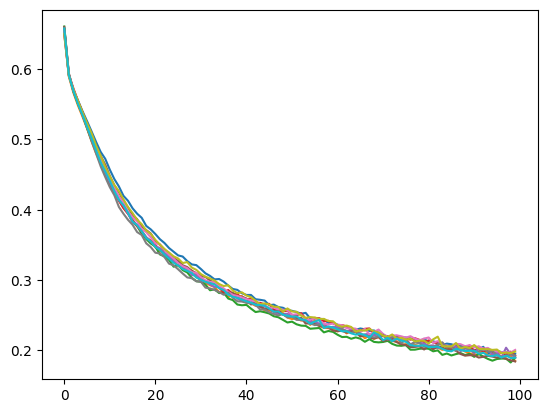

In [35]:
num_restarts = 10

random_seeds_1 = [1,2,3,4,5,6,7,8,9,10]
random_seeds_2 = [1,2,3,4,5,6,7,8,9,10]
random_seeds_3 = [1,2,3,4,5,6,7,8,9,10]

logfile = 'fully_connected_64_64_approver_names.txt'

for i in range(num_restarts):
    classifier = MLPClassifier(hidden_layer_sizes = (64, 64), max_iter = 100, activation = 'relu', solver = 'adam', random_state = random_seeds_1[i])
    train_model(classifier, X, y1, random_seeds_2[i], random_seeds_3[i], logfile)

In [36]:
num_restarts = 10

random_seeds_1 = [10,20,30,40,50,60,70,80,90,100]
random_seeds_2 = [10,20,30,40,50,60,70,80,90,100]
random_seeds_3 = [10,20,30,40,50,60,70,80,90,100]

logfile = "fully_connected_128_128_approver_names.txt"

for i in range(num_restarts):
    classifier = MLPClassifier(hidden_layer_sizes = (128, 128), max_iter = 100, activation = 'relu', solver = 'adam', random_state = random_seeds_1[i])
    train_model(classifier, X, y1, random_seeds_2[i], random_seeds_3[i], logfile)

C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\kllyj\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

Adding judge names doesn't seem to help much. Most judges only sign a few warrants. It would be interesting to go back and do some data exploration using the cleaned judge names. It might be interesting to look at the geographical distributions of warrants signed by specific judges, as well as relationships with police units.